# Creating, reading, and writing

In [1]:
import pandas as pd
pd.set_option("max_rows", 5)
import sqlite3

## Exercise 1

In [2]:
df1 = pd.DataFrame([(30, 21)], columns = ["Apples", "Bananas"])

## Exercise 2

In [3]:
df2 = pd.DataFrame([(35, 21), (41, 34)], index = ["2017 Sales", "2018 Sales"], columns = ["Apples", "Bananas"])

## Exercise 3

In [4]:
df3 = pd.Series(["4 cups", "1 cup", "2 large", "1 can"], index = ["Flour", "Milk", "Eggs", "Spam"], name = "Dinner")

## Exercise 4

In [5]:
df4 = pd.read_csv("./data/winemag-data_first150k.csv", index_col = 0)

## Exercise 5

In [6]:
df5 = pd.read_excel("./data/WICAgencies2014ytd.xls", sheet_name = "Pregnant Women Participating")

## Exercise 6

In [7]:
q6_df = pd.DataFrame({'Cows': [12, 20], 'Goats': [22, 19]}, index=['Year 1', 'Year 2'])
q6_df.to_csv("cows_and_goats.csv")

## Exercise 7

In [8]:
conn = sqlite3.connect("./data/database.sqlite")
df7 = pd.read_sql_query("select * from artists", conn)

# Indexing, selecting, and assigning

In [9]:
import seaborn as sns

reviews = pd.read_csv("./data/winemag-data-130k-v2.csv", index_col = 0)
pd.set_option("display.max_rows", 5)

In [10]:
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Exercise 1

In [11]:
df1 = reviews["description"]

## Exercise 2

In [12]:
df2 = df1[0]

## Exercise 3

In [13]:
df3 = reviews.loc[0]

## Exercise 4

In [14]:
df4 = reviews.loc[0:9, "description"]

## Exercise 5

In [15]:
df5 = reviews.loc[[1,2,3,5,8]]

## Exercise 6

In [16]:
df6 = reviews.loc[[0,1,10,100], ["country", "province", "region_1", "region_2"]]

## Exercise 7

In [17]:
df7 = reviews.loc[0:99, ["country", "variety"]]

## Exercise 8

In [18]:
df8 = reviews.loc[reviews.country == "Italy"]

## Exercise 9

In [19]:
df9 = reviews.loc[reviews.region_2.notnull()]

## Exercise 10

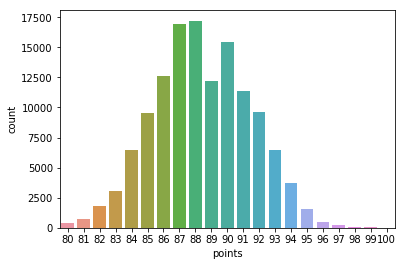

In [20]:
df10 = reviews.points
sns.countplot(df10)

## EXercise 11

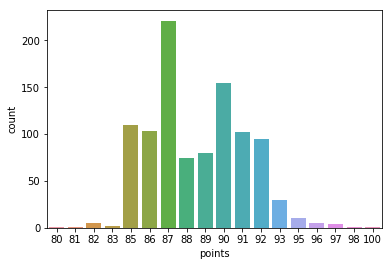

In [21]:
df11 = df10.loc[0:999]
sns.countplot(df11)

## Exercise 12

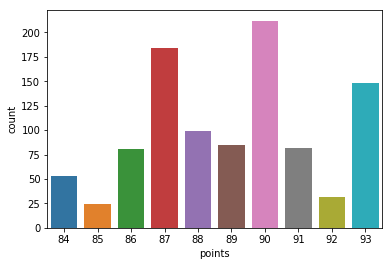

In [22]:
df12 = df10.iloc[-1000:]
sns.countplot(df12)

## Exercise 13

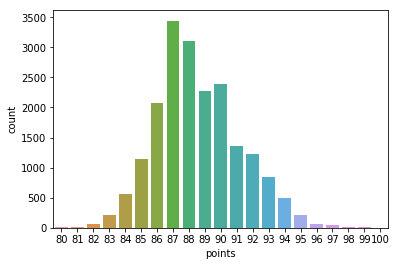

In [23]:
df13 = reviews.points[reviews.country == "Italy"]
sns.countplot(df13)

## Exercise 14

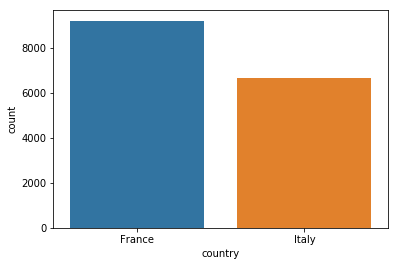

In [24]:
df14 = reviews.country.loc[(reviews.country.isin(["France", "Italy"])) & (reviews.points >= 90)]
sns.countplot(df14)

# Summary functions and maps

In [25]:
import numpy as np

## Exercise 1

In [26]:
reviews.points.median()

88.0

## Exercise 2

In [27]:
reviews.country.unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt'], dtype=object)

## Exercise 3

In [28]:
reviews.country.value_counts()

US          54504
France      22093
            ...  
Slovakia        1
China           1
Name: country, Length: 43, dtype: int64

## Exercise 4

In [29]:
median_price = reviews.price.median()
reviews.price.map(lambda x: x - median_price)

0          NaN
1        -10.0
          ... 
129969     7.0
129970    -4.0
Name: price, Length: 129971, dtype: float64

## Exercise 5

In [30]:
df5 = reviews.loc[(reviews.points / reviews.price).idxmax()].title

## Exercise 6

In [31]:
tropical_df = reviews.description[reviews.description.map(lambda s: "tropical" in s)]
fruity_df = reviews.description[reviews.description.map(lambda s: "fruity" in s)]
df6 = pd.Series([tropical_df.count(), fruity_df.count()], index = ["tropical", "fruity"])

## Exercise 7

In [32]:
non_null_df = reviews.loc[(reviews.country.notnull()) & (reviews.variety.notnull())]
concat_df = (non_null_df.country + " - " + non_null_df.variety)
df7 = concat_df.value_counts()

# Grouping and sorting

## Exercise 1

In [33]:
df1 = reviews.groupby("taster_twitter_handle").taster_twitter_handle.count().sort_values(ascending = False)
df1_alt = reviews.taster_twitter_handle.value_counts()

## Exercise 2

In [34]:
df2 = reviews.groupby("price").points.max()

## Exercise 3

In [35]:
df3 = reviews.groupby("variety").price.agg([min, max])

## Exercise 4

In [36]:
df4 = reviews.groupby("taster_name").points.mean()

## Exercise 5

In [37]:
df5 = reviews.groupby("variety").price.agg([min, max]).sort_values(by = ["min", "max"], ascending = False)

## Exercise 6

In [38]:
df6 = reviews.groupby(["country", "variety"]).country.count().sort_values(ascending = False)

# Data types and missing values

## Exercise 1

In [39]:
df1 = reviews.points.dtype

## Exercise 2

In [40]:
df2 = reviews.price.astype("str")

## Exercise 3

In [41]:
df3 = reviews.price.isnull()

## Execise 4

In [42]:
df4 = reviews.region_1.fillna("Unknown").value_counts()

## Exercise 5

In [43]:
df5 = reviews.isnull().sum()

# Renaming and combining

## Exercise 1

In [44]:
df1 = reviews.rename(columns = {"region_1": "region", "region_2": "locale"})

## Exercise 2

In [45]:
df2 = reviews.rename_axis("wines", "rows")

In [46]:
gaming_products = pd.read_csv("./data/top-things/reddits/g/gaming.csv")
gaming_products['subreddit'] = "r/gaming"
movie_products = pd.read_csv("./data/top-things/reddits/m/movies.csv")
movie_products['subreddit'] = "r/movies"

## Exercise 3

In [47]:
df3 = pd.concat([gaming_products, movie_products])

In [48]:
powerlifting_meets = pd.read_csv("./data/meets.csv")
powerlifting_competitors = pd.read_csv("./data/openpowerlifting.csv")

## Exercise 4

In [49]:
df4 = powerlifting_meets.merge(powerlifting_competitors, on = "MeetID", how = "left").set_index("MeetID")

# Method chaining

In [50]:
chess_games = pd.read_csv("./data/games.csv")

## Exercise 1

In [51]:
df1 = chess_games.winner.value_counts() / chess_games.winner.count()

## Exercise 2

In [52]:
def opening_split(s):
    return s.split(':')[0].split('|')[0].split('#')[0].strip()
    
df2 = chess_games.opening_name.map(opening_split).value_counts()

## Exercise 3

In [53]:
df3 = chess_games.assign(n = 0).groupby(["white_id", "victory_status"]).n.count().reset_index()

In [54]:
# Alternative solution giving roughly the same output but much simpler
df3 = chess_games.groupby(["white_id"]).victory_status.value_counts()

## Exercise 4

In [55]:
df4 = (chess_games
       .assign(n = 0)
       .groupby(["white_id", "victory_status"])
       .n
       .count()
       .reset_index()
       .pipe(lambda df: df.loc[df.white_id.isin(
           chess_games.white_id.value_counts().head(20).index
                                               )
                              ]
            )
      )

In [56]:
kepler = pd.read_csv("./data/cumulative.csv")
kepler

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9562,9563,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9563,9564,10156110,K07989.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,1,...,-225.0,4.385,0.054,-0.216,1.193,0.410,-0.137,297.00977,47.121021,14.826


## Exercise 5

In [57]:
df5 = kepler.assign(n=0).groupby(["koi_pdisposition", "koi_disposition"]).n.count()
df5

koi_pdisposition  koi_disposition
CANDIDATE         CANDIDATE          2248
                  CONFIRMED          2248
FALSE POSITIVE    CONFIRMED            45
                  FALSE POSITIVE     5023
Name: n, dtype: int64

In [58]:
# Alternative easier solution
df5 = kepler.groupby(["koi_pdisposition", "koi_disposition"]).kepid.count()
df5

koi_pdisposition  koi_disposition
CANDIDATE         CANDIDATE          2248
                  CONFIRMED          2248
FALSE POSITIVE    CONFIRMED            45
                  FALSE POSITIVE     5023
Name: kepid, dtype: int64

In [59]:
# Alternative easier solution
df5 = kepler.groupby("koi_pdisposition").koi_disposition.value_counts().sort_index()

In [60]:
ramen_reviews = pd.read_csv("./data/ramen-ratings.csv", index_col=0)
ramen_reviews

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
...,...,...,...,...,...,...
2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN
1,Westbrae,Miso Ramen,Pack,USA,0.5,NaN


## Exercise 6

In [61]:
# Solution required by check_q6. does not correspond to the formulation of the exercise since it 
# turns the ratings into a 0-5 scale, in steps of 0.25.
df6 = ((reviews.points - 80) / 4).value_counts().sort_index().rename_axis("Wine Ratings")

In [62]:
# Proper solution to exercise according to the specification. Rounds floats to nearest int.
df6 = (((reviews.points - 80) / 5 + 1)
       .map(lambda x: round(x))
       .astype("int")
       .value_counts()
       .sort_index()
       .rename_axis("Wine Ratings")
      )

## Exercise 7

In [63]:
df7 = (ramen_reviews
       .Stars[ramen_reviews.Stars != "Unrated"]
       .astype("float64")
       .value_counts()
       .sort_index()
       .rename_axis("Ramen Ratings")
      )

## Exercise 8

In [64]:
# This solution is counted as correct despite the actions 
#.replace("Unrated", None).dropna() not actually getting rid of the "Unrated" entries.
# Note also that the answer_q8 in the Kaggle workbook is different 
# from the answer_q8 provided in the data, method_chaining.py file.
# In fact the answer_q8 in method_chaining.py is wrong since it doesn't
# round to nearest half integer.
df8 = (ramen_reviews
       .Stars
       .replace("Unrated", None)
       .dropna()
       .astype("float64")
       .map(lambda x: round(2 * x) / 2)
       .value_counts()
       .rename_axis("Ramen Reviews")
       .sort_index()
      )
check_q8(df8)

NameError: name 'check_q8' is not defined

In [ ]:
# This is a solution that correctly gets rid of the "Unrated" entries.
df8 = (ramen_reviews
       .Stars[ramen_reviews.Stars != "Unrated"]
       .astype("float64")
       .map(lambda x: round(2 * x) / 2)
       .value_counts()
       .rename_axis("Ramen Reviews")
       .sort_index()
      )